In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier
import xgboost as xgb
import scipy.stats as stats

## Exploratory Data Analysis (EDA):

In [3]:
df=pd.read_csv("elements.csv")

In [4]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [8]:
df.duplicated().sum()

1

<Axes: >

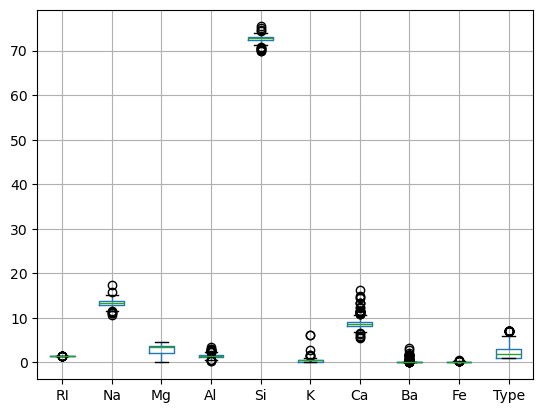

In [9]:
df.boxplot()

In [10]:
features=df.drop(columns='Type')
target=df['Type']

In [11]:
for columns in features.columns:
    features[columns]=pd.to_numeric(features[columns],errors='coerce')

In [12]:
features

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


## Data Visualization:

<Figure size 2000x1000 with 0 Axes>

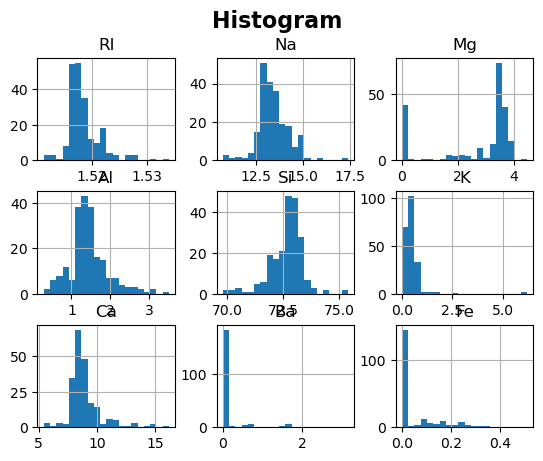

In [14]:
plt.figure(figsize=(20,10))
features.hist(bins=20)
plt.suptitle("Histogram",fontsize=16,fontweight='bold')
plt.show()

<Figure size 2000x1000 with 0 Axes>

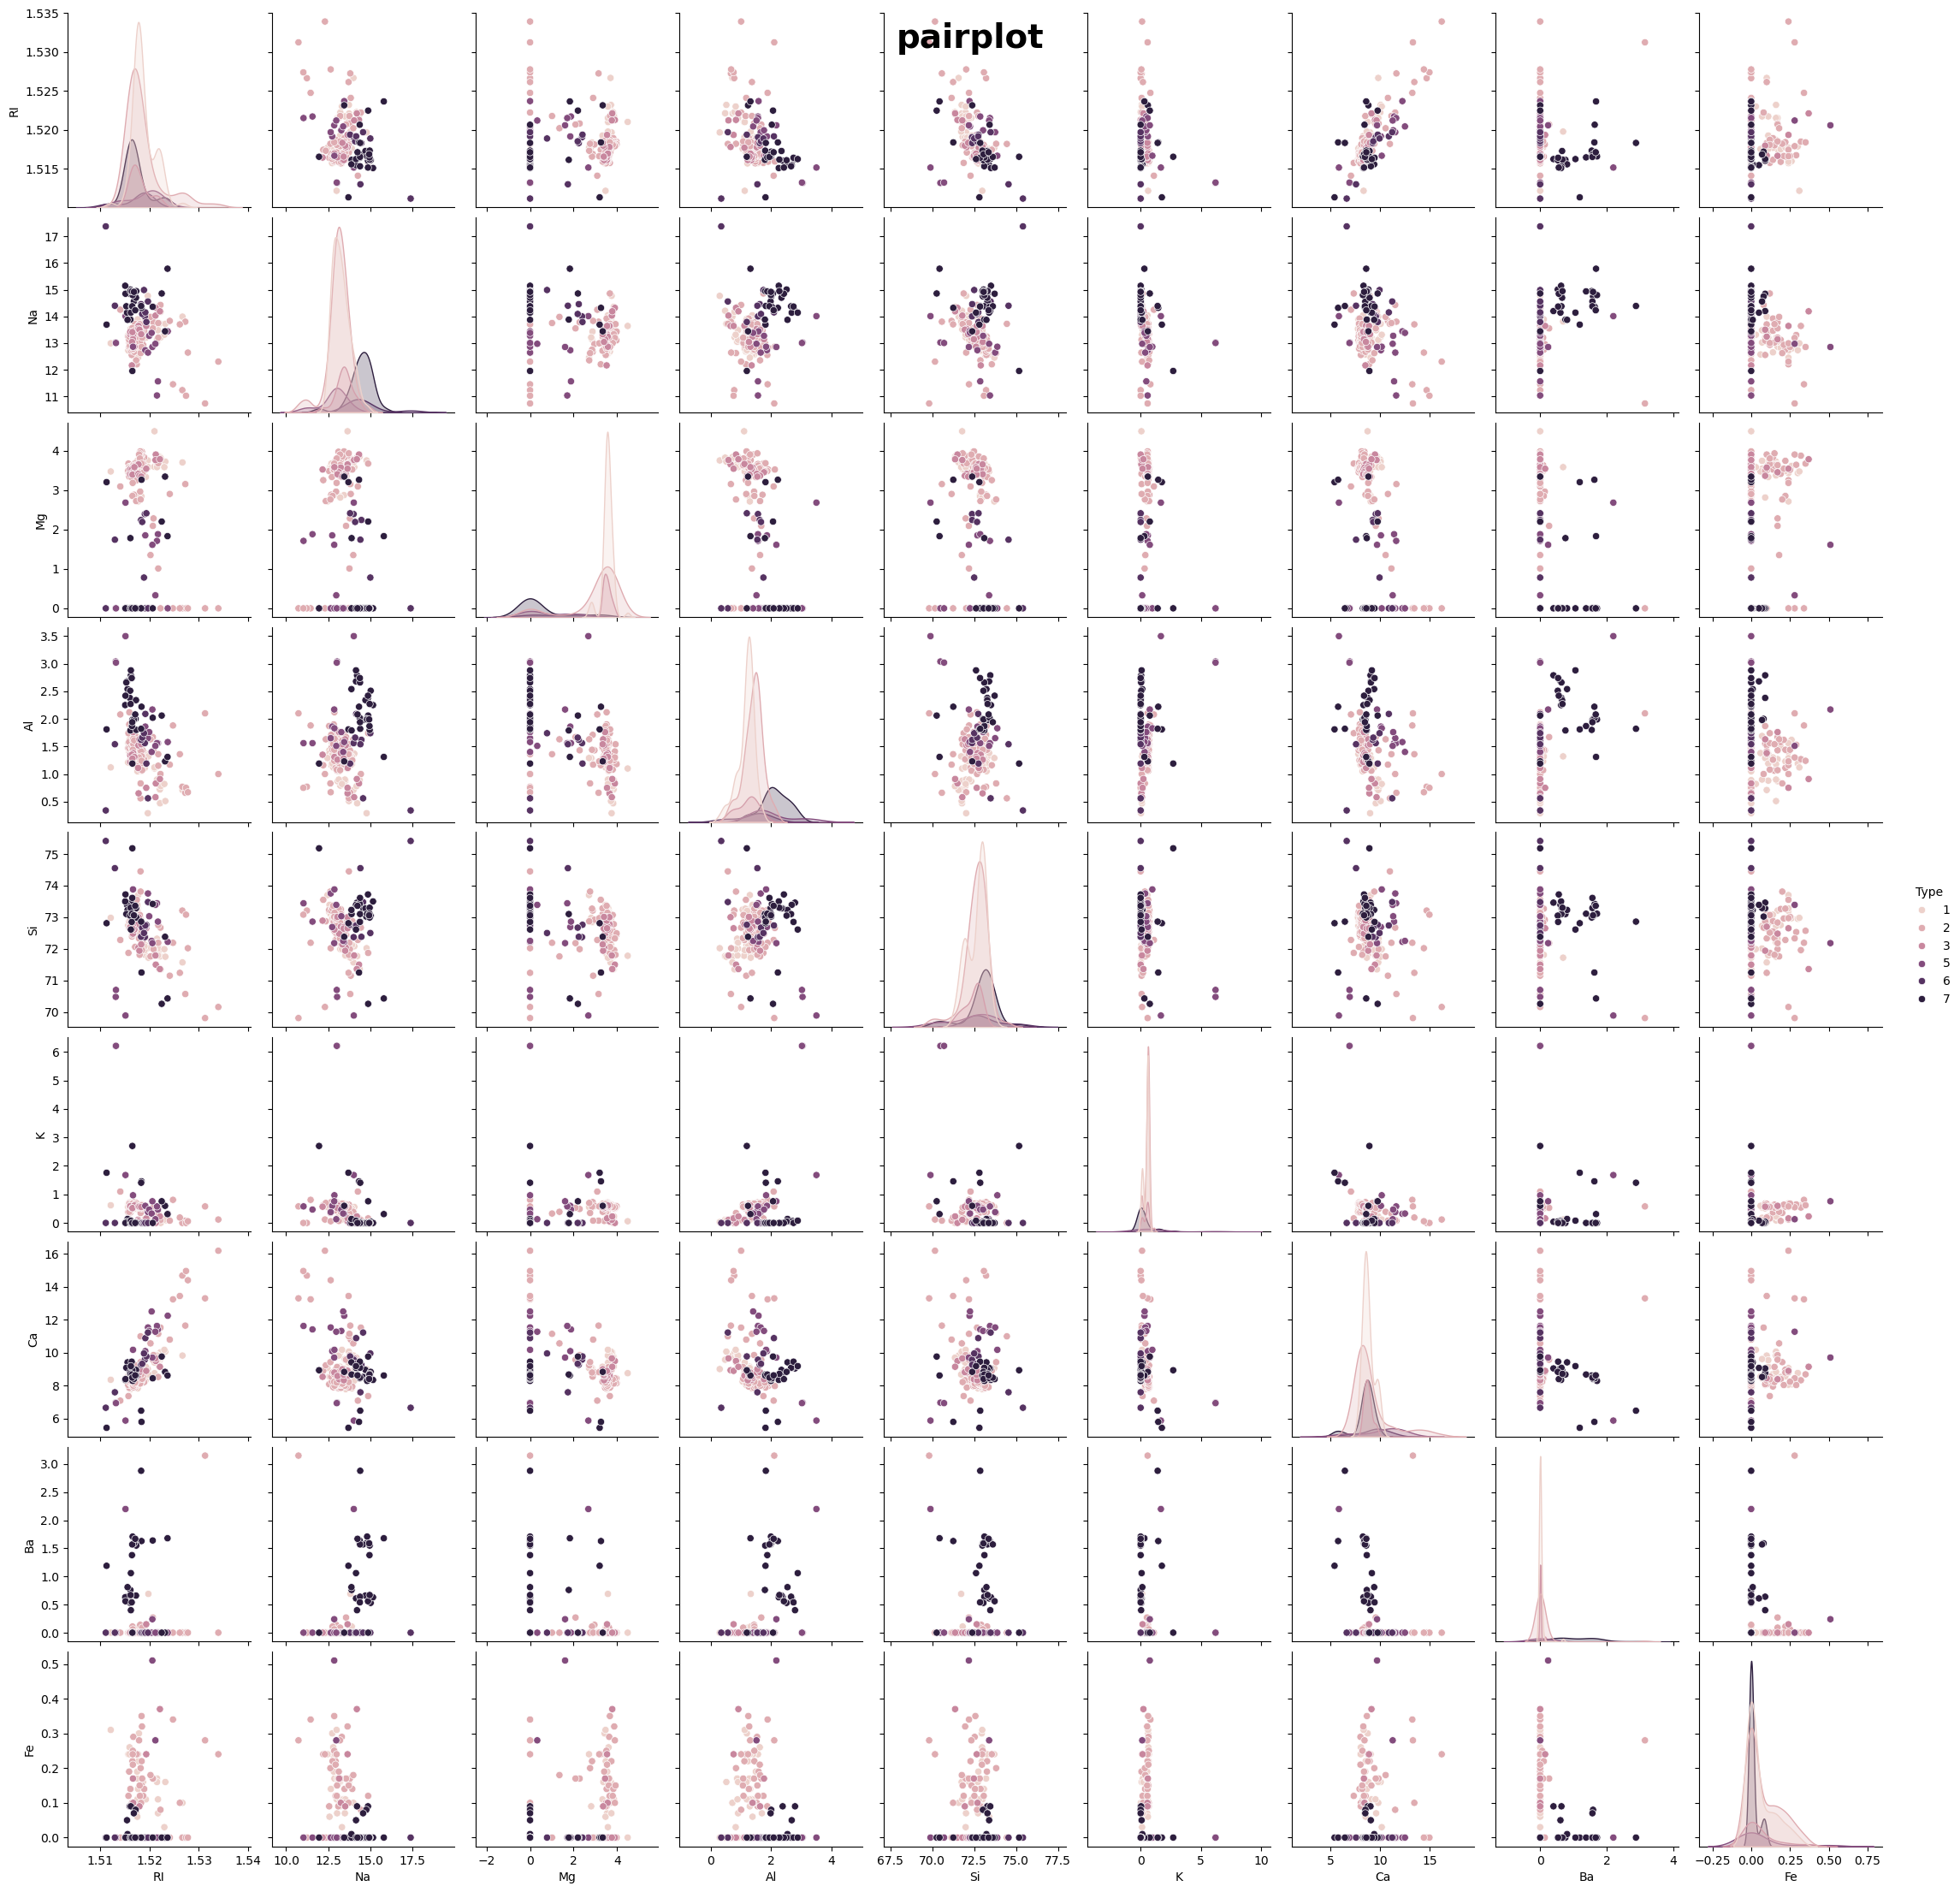

In [15]:
plt.figure(figsize=(20,10))
sns.pairplot(df,hue='Type')
plt.suptitle("pairplot",fontsize=28,fontweight='bold')
plt.show()

In [16]:
def b_p(df,columns):
    plt.figure(figsize=(20,10))
    sns.boxplot(data=features,color='black')
    plt.suptitle("Boxplot",fontsize=18,fontweight='bold')
    plt.show()

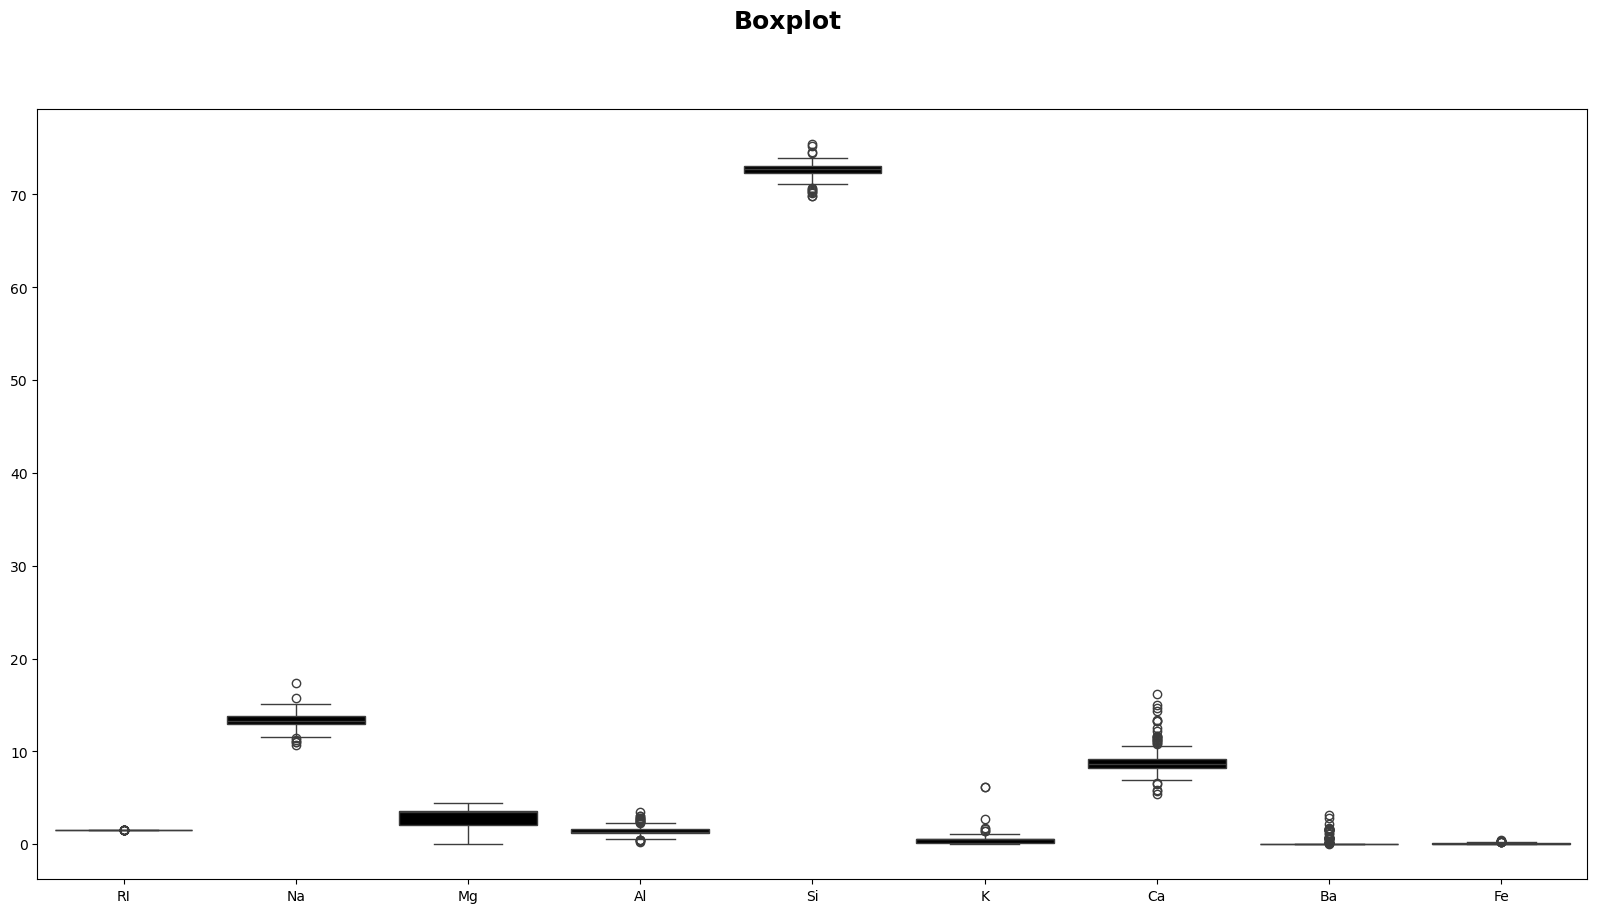

In [17]:
b_p(features,features.columns)

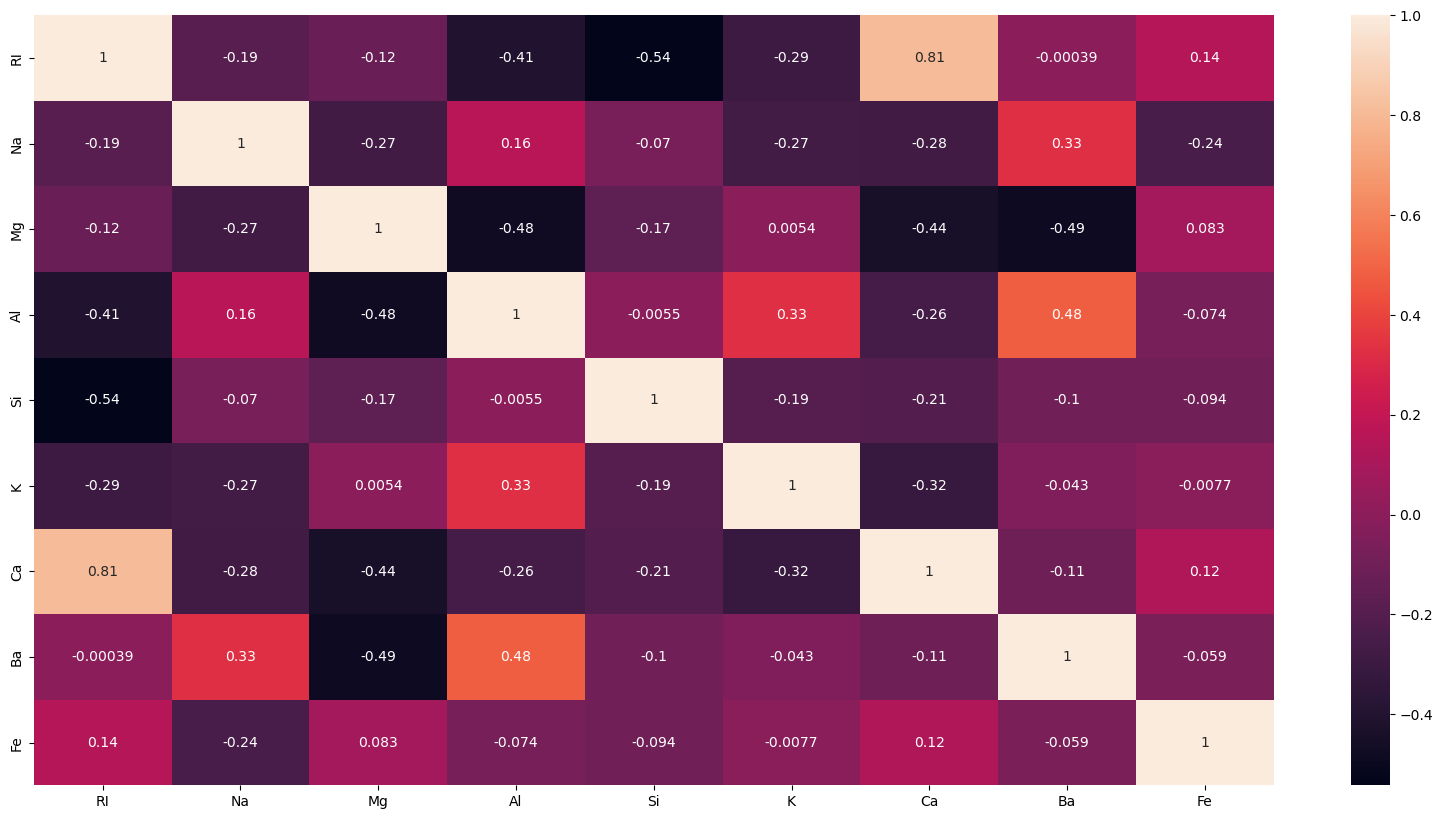

In [18]:
plt.figure(figsize=(20,10))
corr=features.corr()
sns.heatmap(data=corr,annot=True,color='black')
plt.show()

##  Data Preprocessing

In [20]:
features.isnull().sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64

In [21]:
features.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [22]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


In [23]:
target

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [24]:
def o_r(df,columns):
    thres=3
    z_score=stats.zscore(features[columns])
    return features[(abs(z_score)<thres).all(axis=1)]

In [25]:
features=o_r(features,features.columns)

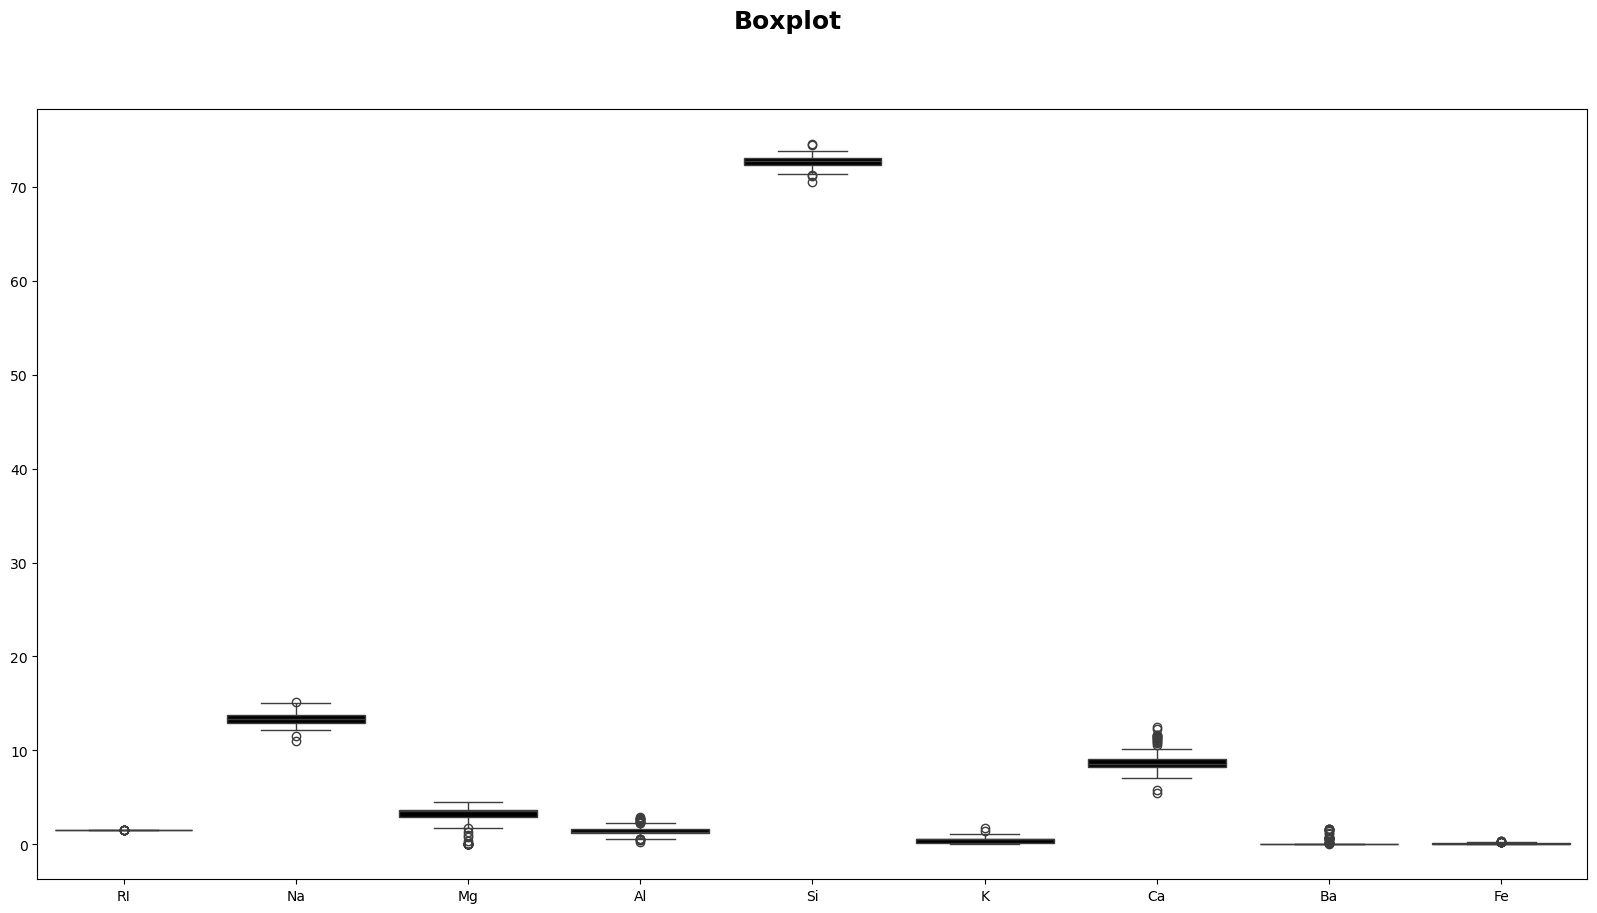

In [26]:
b_p(features,features.columns)

In [27]:
std=StandardScaler()
features=pd.DataFrame(std.fit_transform(features),columns=features.columns)
features

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.291781,0.332127,1.233397,-0.729105,-1.612464,-1.319609,-0.075653,-0.346292,-0.603056
1,-0.197832,0.704398,0.551581,-0.141722,0.016082,0.172091,-1.008147,-0.346292,-0.603056
2,-0.824346,0.168328,0.513277,0.264928,0.461790,-0.147559,-1.058826,-0.346292,-0.603056
3,-0.175926,-0.308179,0.620529,-0.299864,-0.189629,0.491741,-0.612851,-0.346292,-0.603056
4,-0.281075,-0.218834,0.566903,-0.412822,0.616073,0.420708,-0.764888,-0.346292,-0.603056
...,...,...,...,...,...,...,...,...,...
189,-0.727959,1.419158,-2.206325,2.975928,0.221793,-1.532708,0.633854,1.169695,-0.603056
190,-0.802440,1.076668,-2.206325,3.292211,-0.189629,-1.248575,0.360187,2.629534,-0.603056
191,-0.530805,2.238153,-2.206325,1.281553,0.581788,-1.532708,-0.430406,4.117447,-0.603056
192,1.134057,1.404267,-2.206325,1.349328,1.198921,-1.532708,-0.389863,4.257816,-0.603056


In [28]:
df=pd.merge(features,target,left_index=True,right_index=True)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.291781,0.332127,1.233397,-0.729105,-1.612464,-1.319609,-0.075653,-0.346292,-0.603056,1
1,-0.197832,0.704398,0.551581,-0.141722,0.016082,0.172091,-1.008147,-0.346292,-0.603056,1
2,-0.824346,0.168328,0.513277,0.264928,0.461790,-0.147559,-1.058826,-0.346292,-0.603056,1
3,-0.175926,-0.308179,0.620529,-0.299864,-0.189629,0.491741,-0.612851,-0.346292,-0.603056,1
4,-0.281075,-0.218834,0.566903,-0.412822,0.616073,0.420708,-0.764888,-0.346292,-0.603056,1
...,...,...,...,...,...,...,...,...,...,...
189,-0.727959,1.419158,-2.206325,2.975928,0.221793,-1.532708,0.633854,1.169695,-0.603056,7
190,-0.802440,1.076668,-2.206325,3.292211,-0.189629,-1.248575,0.360187,2.629534,-0.603056,7
191,-0.530805,2.238153,-2.206325,1.281553,0.581788,-1.532708,-0.430406,4.117447,-0.603056,7
192,1.134057,1.404267,-2.206325,1.349328,1.198921,-1.532708,-0.389863,4.257816,-0.603056,7


In [29]:
features=df.drop(columns='Type')
target=df['Type']

##  Random Forest Model Implementation

In [31]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)

In [32]:
rand=RandomForestClassifier(n_estimators=100,max_depth=3,max_samples=1.0,max_features='sqrt',bootstrap=True,criterion='entropy')

In [33]:
rand.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_samples=1.0)

In [34]:
y_pred=rand.predict(x_test)

In [35]:
rf=accuracy_score(y_test,y_pred)
rf

0.7435897435897436

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.59      1.00      0.74        10
           2       0.81      0.76      0.79        17
           3       1.00      0.50      0.67         8
           5       1.00      0.50      0.67         4

    accuracy                           0.74        39
   macro avg       0.85      0.69      0.72        39
weighted avg       0.81      0.74      0.74        39



## Bagging and Boosting Methods

In [38]:
bg=BaggingClassifier(estimator=RandomForestClassifier(),n_estimators=100,max_samples=1.0,max_features=0.9,bootstrap=True)

In [39]:
bg.fit(x_train,y_train)

BaggingClassifier(estimator=RandomForestClassifier(), max_features=0.9,
                  n_estimators=100)

In [40]:
y_pred1=bg.predict(x_test)

In [41]:
rfb=accuracy_score(y_test,y_pred1)
rfb

0.7435897435897436

In [42]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           1       0.67      1.00      0.80        10
           2       0.75      0.88      0.81        17
           3       1.00      0.38      0.55         8
           5       1.00      0.25      0.40         4

    accuracy                           0.74        39
   macro avg       0.85      0.63      0.64        39
weighted avg       0.81      0.74      0.71        39



In [43]:
xgb=xgb.XGBClassifier(n_estimators=100,min_child_weight=2,learning_rate=0.5,reg_lambda=1,reg_alpha=2)

In [44]:
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

In [45]:
!pip install xgboost

In [46]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [47]:
y_pred4=xgb.predict(x_test)

In [48]:
accuracy_score(y_test,y_pred4)

0.717948717948718

In [49]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       0.70      0.82      0.76        17
           2       0.75      0.38      0.50         8
           3       1.00      0.25      0.40         4

    accuracy                           0.72        39
   macro avg       0.79      0.61      0.62        39
weighted avg       0.74      0.72      0.69        39



In [50]:
g_b=GradientBoostingClassifier(n_estimators=100,learning_rate=0.5,max_depth=2,max_features=0.9,subsample=0.9)

In [51]:
g_b.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=0.9,
                           subsample=0.9)

In [52]:
y_pred5=g_b.predict(x_test)

In [53]:
gb=accuracy_score(y_test,y_pred5)
gb

0.7692307692307693

In [54]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74        10
           1       0.88      0.82      0.85        17
           2       1.00      0.38      0.55         8
           3       1.00      0.75      0.86         4

    accuracy                           0.77        39
   macro avg       0.87      0.74      0.75        39
weighted avg       0.84      0.77      0.76        39



## Comparison Of Results

In [56]:
print("Random Forest Performance:")
print(f"Accuracy: {rfb:.2f}")

print("Gradient Boosting Performance:")
print(f"Accuracy: {gb:.2f}")


Random Forest Performance:
Accuracy: 0.74
Gradient Boosting Performance:
Accuracy: 0.77


## Additional Notes:

In [58]:
### Explain Bagging and Boosting methods. How is it different from each other.

In [59]:
### Bagging: Reduces variance, works well with high-variance models. Each model is trained independently.
### Boosting: Reduces bias and variance, focuses on difficult-to-classify examples, and models are trained sequentially.

In [60]:
## Explain how to handle imbalance in the data.

In [61]:
## Resampling: Increase the number of minority class samples or reduce majority class samples.
## Use Class Weights: Many classifiers in scikit-learn allow you to specify class weights to give more importance to the minority class